# Ames Housing Data and Kaggle Challenge

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import skew,norm
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV,LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score,mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

train_df = pd.read_csv("datasets/train.csv")
test_df = pd.read_csv("datasets/test.csv")

y = train_df.SalePrice

#test
# log_y = [np.log(i) for i in y]
# get summary of basic stats for sale prices
# print(y.describe())

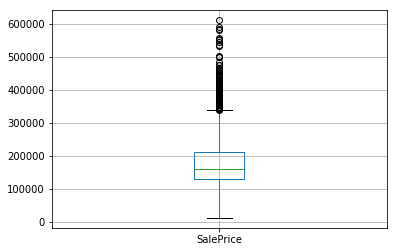

In [34]:
train_df.boxplot('SalePrice', return_type = 'dict')
plt.show()

In [35]:
train_df.isnull().sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       330
Lot Area             0
Street               0
Alley             1911
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        22
Mas Vnr Area        22
Exter Qual           0
Exter Cond           0
                  ... 
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area

In [36]:
# sns.pairplot(train_df)

In [37]:
# train_df.info()
# train_df.columns

In [38]:
#make basement binary dummy
train_df = train_df[train_df['SalePrice'] < 466075]

train_df['HasBsmt'] = pd.Series(len(train_df['Total Bsmt SF']), index=train_df.index)
train_df['HasBsmt'] = 0 
train_df.loc[train_df['Total Bsmt SF']>0,'HasBsmt'] = 1

In [39]:
# OverallQual
# YearBuilt
# TotalBsmtSF
# GrLivArea

print("\nSkewness: %f" % train_df['SalePrice'].skew())
print("Kurtosis: %f\n" % train_df['SalePrice'].kurt())
train_df['SalePrice'].describe()


Skewness: 1.158188
Kurtosis: 1.513873



count      2033.000000
mean     178391.771766
std       72383.863990
min       12789.000000
25%      129500.000000
50%      161000.000000
75%      213000.000000
max      465000.000000
Name: SalePrice, dtype: float64

In [40]:
train_df['Sale Type'].unique()

array(['WD ', 'New', 'COD', 'ConLD', 'Con', 'CWD', 'Oth', 'ConLI',
       'ConLw'], dtype=object)

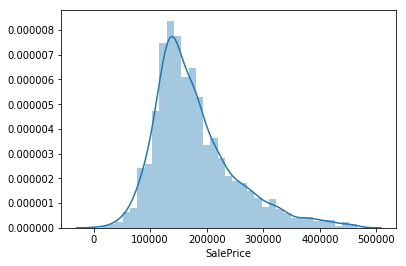

In [41]:
sns.distplot(train_df.SalePrice);


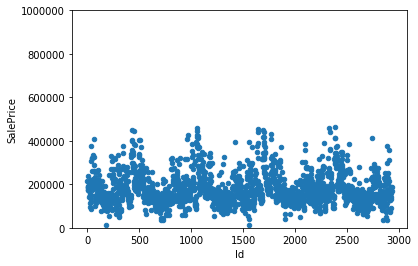

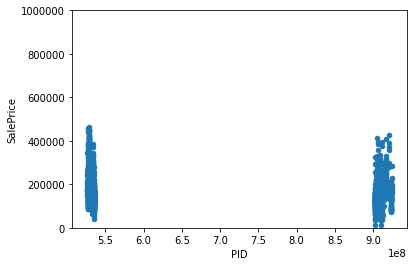

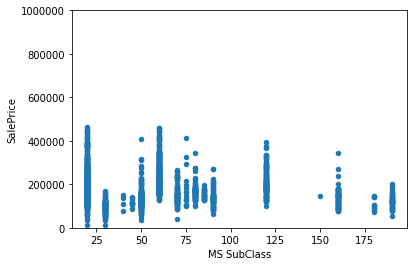

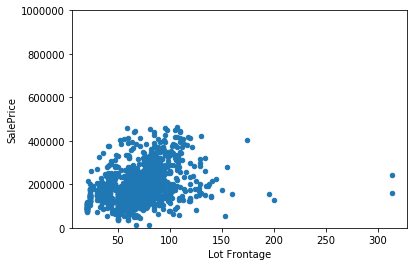

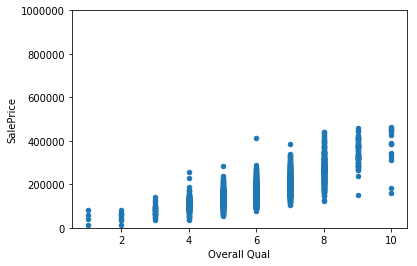

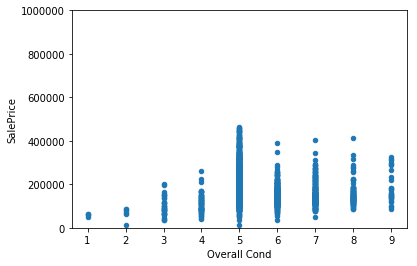

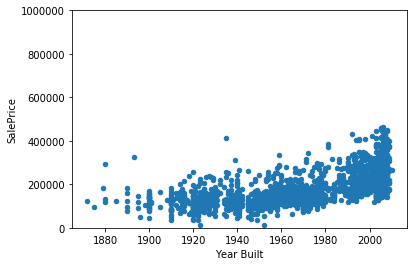

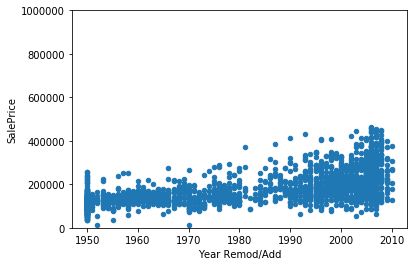

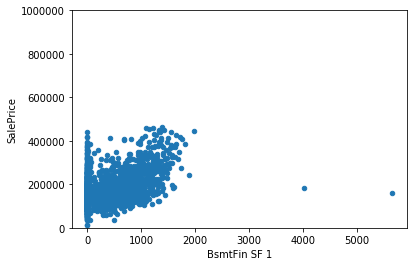

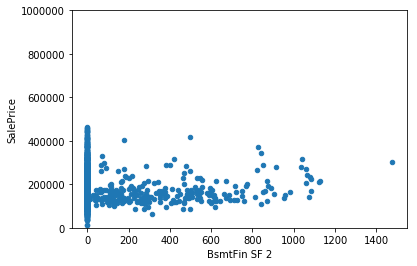

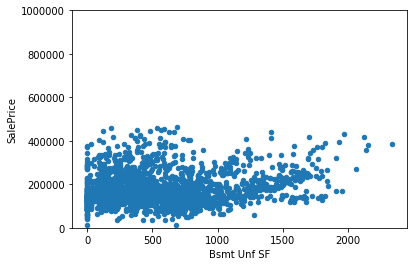

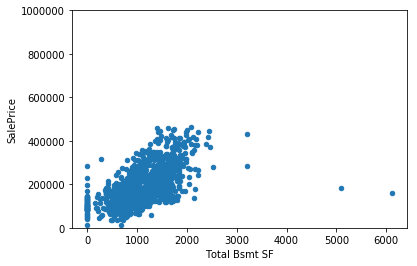

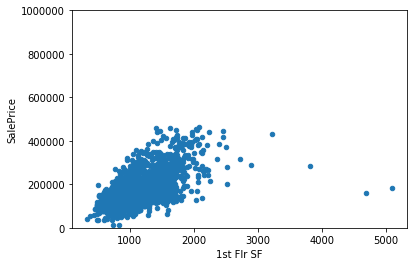

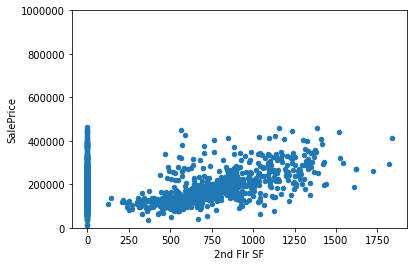

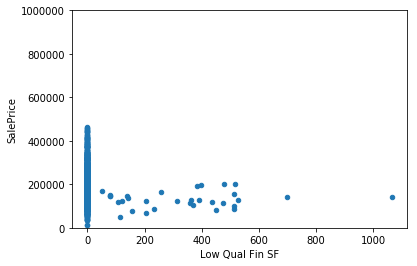

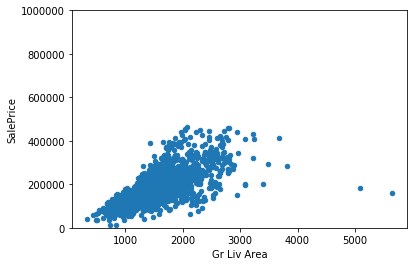

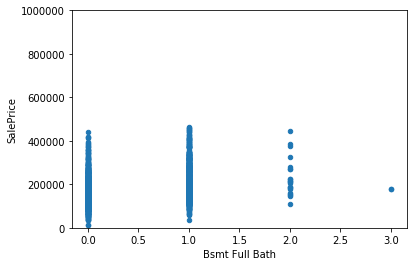

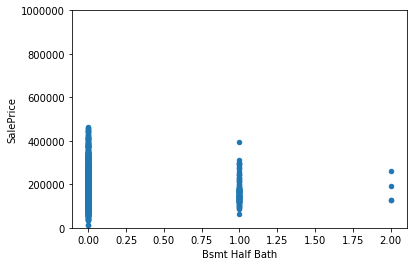

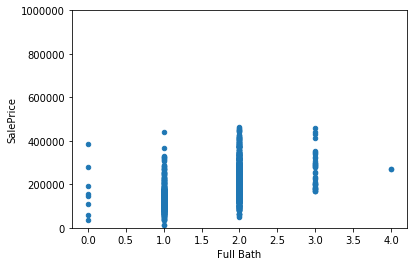

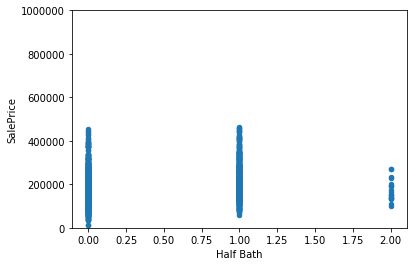

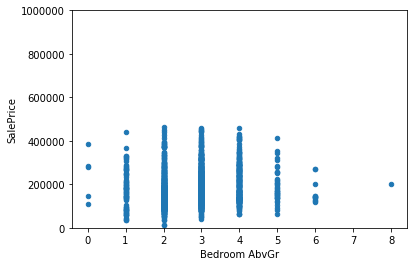

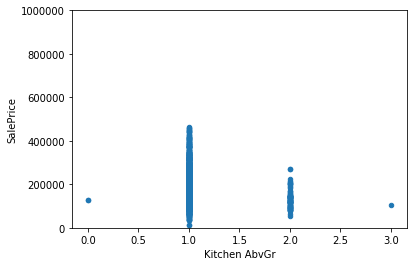

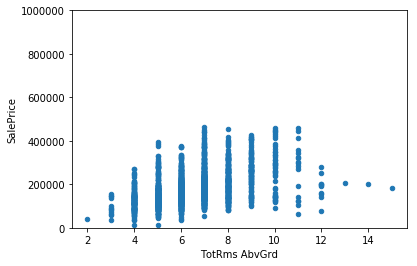

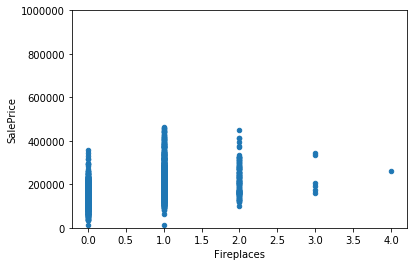

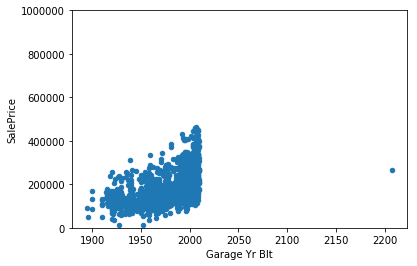

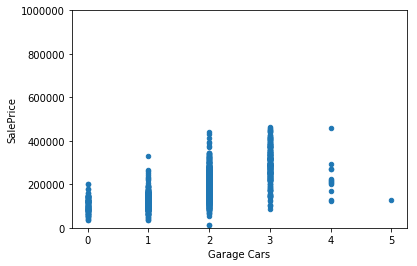

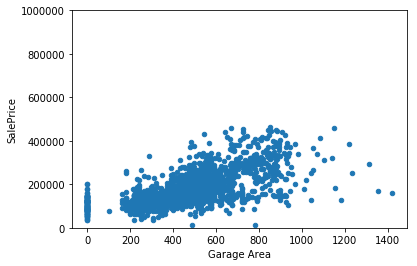

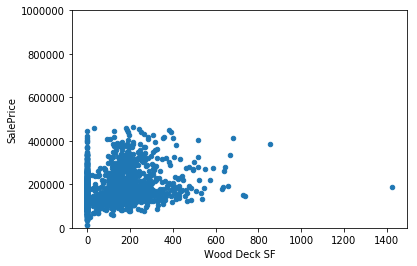

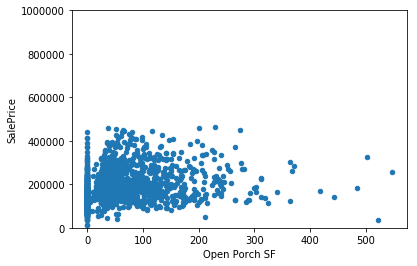

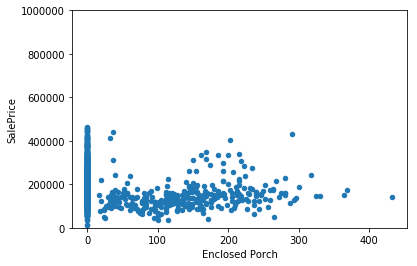

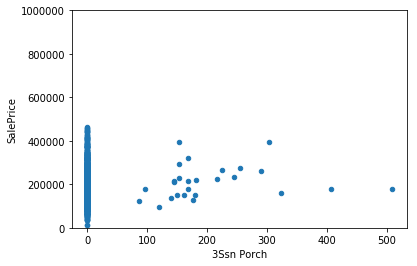

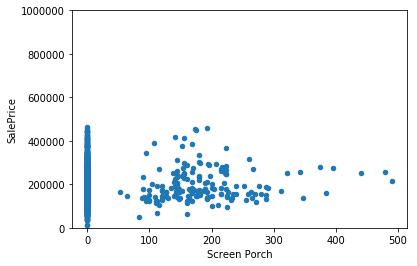

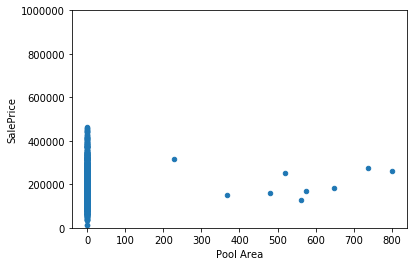

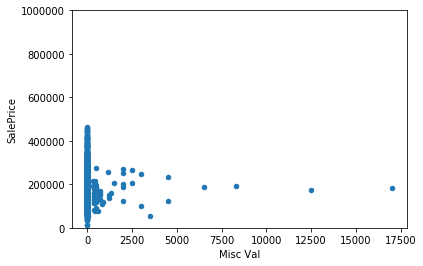

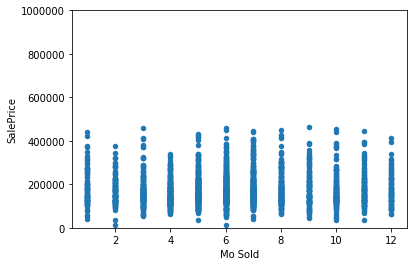

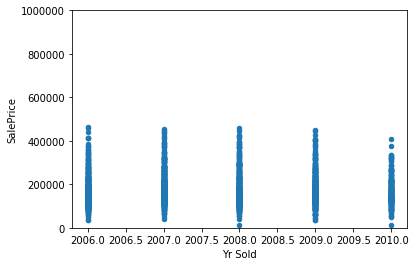

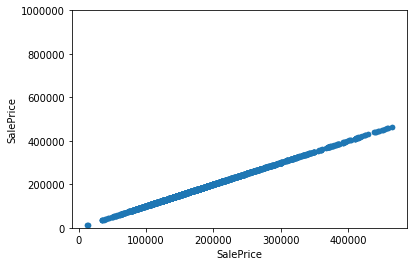

In [42]:
num_vars = ['Id', 'PID', 'MS SubClass', 'Lot Frontage', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt',
        'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice']
# for v in num_vars:
#     print(v,":",train_df[v].dtypes)

for i in range(0,len(num_vars)):
    data = pd.concat([train_df['SalePrice'], train_df[num_vars[i]]], axis=1)
    data.plot.scatter(x=str(num_vars[i]), y='SalePrice', ylim=(0,1000000));

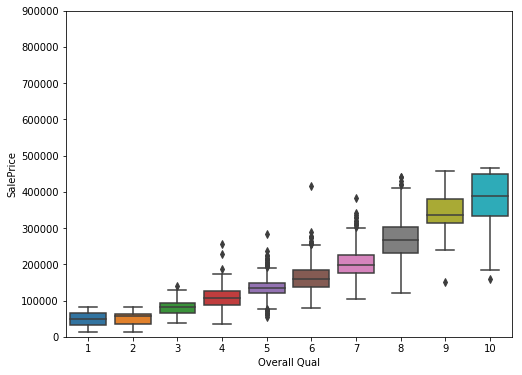

In [43]:
var = 'Overall Qual'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=900000);

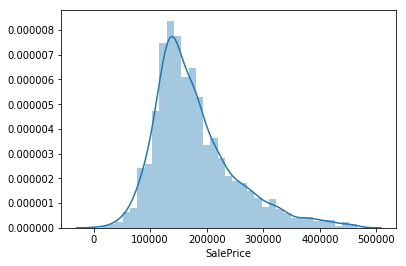

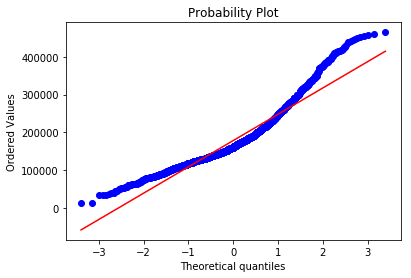

In [44]:
sns.distplot(train_df['SalePrice']);
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)

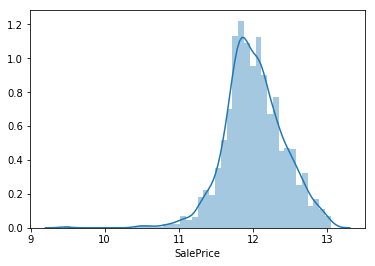

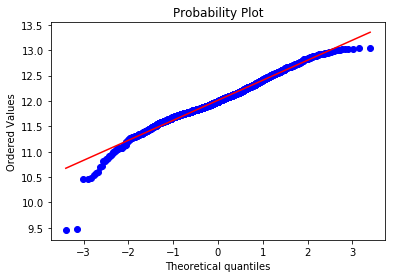

In [45]:
log_df = pd.DataFrame()
log_df['SalePrice'] = np.log(train_df['SalePrice'])

sns.distplot(log_df['SalePrice']);
fig = plt.figure()
res = stats.probplot(log_df['SalePrice'], plot=plt)


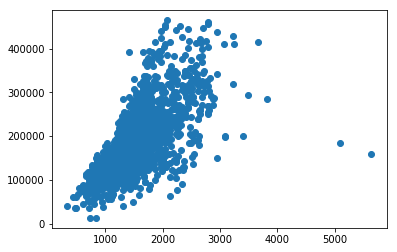

In [46]:
plt.scatter(x = train_df['Gr Liv Area'], y = train_df['SalePrice'])
plt.show()
plt

mu = 178391.77 and sigma = 72366.06


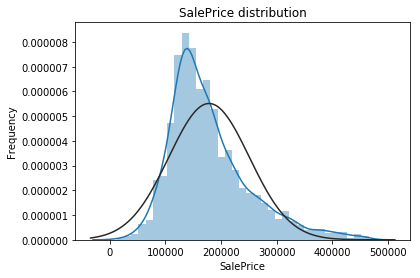

In [47]:
sns.distplot(train_df.SalePrice, fit=norm)
(mu, sigma) = norm.fit(train_df.SalePrice)
print('mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.show()

In [48]:
train_df['Garage Yr Blt'] = train_df['Garage Yr Blt'].fillna(train_df['Year Built']).astype('int')
train_df['Garage Cars'] = train_df['Garage Cars'].fillna(0).astype('int')

# Feature Engineering- total sqfootage feature
train_df['Total SF'] = train_df['Total Bsmt SF'] + train_df['1st Flr SF'] + train_df['2nd Flr SF']
train_df['Total SF'] = train_df['Total SF'].fillna(0).astype('int')

train_df['Lot Frontage'].fillna(0,inplace=True)
train_df['Garage Area'].fillna(0,inplace=True)

train_df['LogSalePrice'] = np.log(train_df['SalePrice'])

train_df['qual'] = train_df['Overall Cond'] * train_df['Overall Qual']
train_df['building_area'] = train_df['Gr Liv Area'] + train_df['Total Bsmt SF'] + train_df['Garage Area']
train_df['building_area'].fillna(0,inplace=True)

# all_data = all_data.fillna(all_data.mean())

In [55]:
# features = [col for col in df._get_numeric_data().columns if col != '']
features = ['building_area','qual','Overall Qual','Lot Area','Year Built','TotRms AbvGrd','Fireplaces','Overall Cond','Overall Qual','1st Flr SF','Gr Liv Area']
# for i in features:
#     train_df[i] = np.log1p(train_df[i].values)

X = train_df[features]
y = train_df.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
ss = StandardScaler()
ss.fit(X_train,y_train)




X_train =  np.log1p(ss.transform(X_train))
X_test = ss.transform(X_test)

lr = LinearRegression()
lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [50]:
lr_scores = cross_val_score(lr, X_train, y_train, cv=3)
lr_scores.mean()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [51]:
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=3)
lasso_scores.mean()

NameError: name 'lasso' is not defined

In [52]:
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=3)
ridge_scores.mean()

NameError: name 'ridge' is not defined

In [53]:
ridge.fit(X_train, y_train)
ridge.score(X_train, y_train)

NameError: name 'ridge' is not defined

In [54]:
ridge.score(X_test, y_test)

NameError: name 'ridge' is not defined

In [ ]:
ridge_preds = np.expm1(ridge.predict(X_test))
ridge_preds

In [ ]:
pred = ridge.predict(X_test)
mean_squared_error(y_test, pred)**(1/2)

In [ ]:
print("Correlation")
train_df.corr()['SalePrice'].sort_values(ascending=False)


In [ ]:
pd.Series(ridge.coef_, index=features).plot.bar(figsize=(15, 7))
plt.title("Variable Correlation")

In [ ]:
# enet_alphas = np.arange(0.5, 1.0, 0.005)

# # Set up our l1 ratio. (What does this do?)
# enet_ratio = 0.5

# # Instantiate model.
# enet_model = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_ratio, cv=5)

# # Fit model using optimal alpha.
# enet_model = enet_model.fit(X_train, y_train)

# # Generate predictions.
# enet_model_preds = enet_model.predict(X_test)
# enet_model_preds_train = enet_model.predict(X_train)

# # Evaluate model.
# print(r2_score(y_test, enet_model_preds))
# print(r2_score(y_train, enet_model_preds_train))

In [ ]:
# train_df.isnull().sum()

In [ ]:
print(pred)

In [ ]:
sub = pd.DataFrame(pred)
sub.to_csv('submission.csv',header=True)
sub.shape

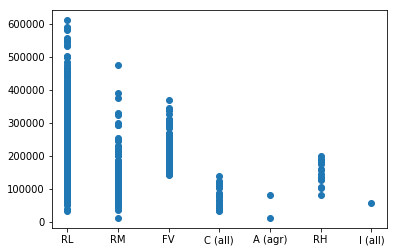

In [37]:
plt.scatter(train_df['MS Zoning'],train_df['SalePrice'])

In [ ]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="mean_squared_error", cv = 5))
    return(rmse)
